In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps
import time
import sys
import os
from pprint import pprint
from scipy import stats

from config import api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities: {len(cities)}")

607

In [117]:
def get_weather(cities_arr, url, units):
    cities = []
    lats = []
    lngs = []
    temps = []
    rhs = []
    clouds = []
    winds = []
    
    for city in cities_arr:
        query_url = f"{url}q={city}&units={units}&appid={api_key}"
        response = requests.get(query_url).json()
        try:
            cities.append(response['name'])
            lats.append(response['coord']['lat'])
            lngs.append(response['coord']['lon'])
            temps.append(response['main']['temp'])
            rhs.append(response['main']['humidity'])
            clouds.append(response['clouds']['all'])
            winds.append(response['wind']['speed'])
        except:
            pass
        
    return {
        'City': cities,
        'Latitude': lats,
        'Longitude': lngs,
        'Temperature (F)': temps,
        'Humidity (%)': rhs,
        'Cloudiness (%)': clouds,
        'Wind Speed (mph)': winds
    }

In [ ]:
results = get_weather(cities, url, 'imperial')

In [128]:
results_df = pd.DataFrame(results)
results_df.head()

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,Ribeira Grande,38.52,-28.70,66.63,83,72,10.38
1,Okhotsk,59.38,143.30,37.87,82,100,16.33
2,Albany,42.60,-73.97,50.13,70,37,10.00
3,Vaini,-21.20,-175.20,75.20,88,90,11.41
4,Nacala,-14.54,40.67,73.74,90,0,2.15


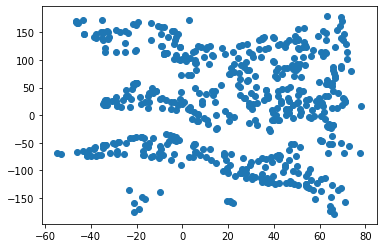

In [129]:
plt.scatter(results_df['Latitude'], results_df['Longitude'])
plt.title('Temperature (F) vs Latitude')
plt.xlabel('Latitude')